In [11]:
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
client = pymongo.MongoClient("localhost:27017")
db = client['flightDB']
collection = db['flightData']


a) Create collections “flights” inside database “airline_delayDB”

In [3]:
dummy_document = {
    "ID": 1,
    "YEAR": 2015,
    "MONTH": 1,
    "DAY": 1,
    "DAY_OF_WEEK": 1,
    "AIRLINE": "XYZ",
    "FLIGHT_NUMBER": "1234",
    "TAIL_NUMBER": "N12345",
    "ORIGIN_AIRPORT": "JFK",
    "DESTINATION_AIRPORT": "LAX",
    "SCHEDULED_DEPARTURE": "1230",
    "DEPARTURE_TIME": "1245",
    "DEPARTURE_DELAY": 15,
    "TAXI_OUT": 10,
    "WHEELS_OFF": "1255",
    "SCHEDULED_TIME": "1500",
    "ELAPSED_TIME": 180,
    "AIR_TIME": 165,
    "DISTANCE": 2455,
    "WHEELS_ON": "1505",
    "TAXI_IN": 10,
    "SCHEDULED_ARRIVAL": "1530",
    "ARRIVAL_TIME": "1520",
    "ARRIVAL_DELAY": -10,
    "DIVERTED": 0,
    "CANCELLED": 0
}

# Insert the dummy document into the collection
collection.insert_one(dummy_document)


{'_id': ObjectId('66d138b22e281055f3aeca56'),
 'ID': 0,
 'YEAR': 2015,
 'MONTH': 3,
 'DAY': 4,
 'DAY_OF_WEEK': 3,
 'AIRLINE': 'EV',
 'FLIGHT_NUMBER': 5170,
 'TAIL_NUMBER': 'N842AS',
 'ORIGIN_AIRPORT': 'CVG',
 'DESTINATION_AIRPORT': 'XNA',
 'SCHEDULED_DEPARTURE': 935,
 'DEPARTURE_TIME': 954,
 'DEPARTURE_DELAY': 19,
 'TAXI_OUT': 16,
 'WHEELS_OFF': 1010,
 'SCHEDULED_TIME': 115,
 'ELAPSED_TIME': 129,
 'AIR_TIME': 108,
 'DISTANCE': 562,
 'WHEELS_ON': 1058,
 'TAXI_IN': 5,
 'SCHEDULED_ARRIVAL': 1030,
 'ARRIVAL_TIME': 1103,
 'ARRIVAL_DELAY': 33,
 'DIVERTED': 0,
 'CANCELLED': 0,
 'AIR_SYSTEM_DELAY': 14,
 'SECURITY_DELAY': 0,
 'AIRLINE_DELAY': 19,
 'LATE_AIRCRAFT_DELAY': 0,
 'WEATHER_DELAY': 0}

d) Write a MongoDB query to find all flights that were delayed by more than 60 minutes.

In [6]:
query = {
    '$or': [
        { 'DEPARTURE_DELAY': { '$gt': 60 } },
        { 'ARRIVAL_DELAY': { '$gt': 60 } }
    ]
}

delayed_flights = collection.find(query)

for flight in delayed_flights:
    print(flight)

{'_id': ObjectId('66d138b22e281055f3aeca58'), 'ID': 2, 'YEAR': 2015, 'MONTH': 1, 'DAY': 27, 'DAY_OF_WEEK': 2, 'AIRLINE': 'B6', 'FLIGHT_NUMBER': 716, 'TAIL_NUMBER': 'N309JB', 'ORIGIN_AIRPORT': 'JAX', 'DESTINATION_AIRPORT': 'DCA', 'SCHEDULED_DEPARTURE': 1335, 'DEPARTURE_TIME': 1505, 'DEPARTURE_DELAY': 90, 'TAXI_OUT': 16, 'WHEELS_OFF': 1521, 'SCHEDULED_TIME': 104, 'ELAPSED_TIME': 110, 'AIR_TIME': 91, 'DISTANCE': 634, 'WHEELS_ON': 1652, 'TAXI_IN': 3, 'SCHEDULED_ARRIVAL': 1519, 'ARRIVAL_TIME': 1655, 'ARRIVAL_DELAY': 96, 'DIVERTED': 0, 'CANCELLED': 0, 'AIR_SYSTEM_DELAY': 6, 'SECURITY_DELAY': 0, 'AIRLINE_DELAY': 90, 'LATE_AIRCRAFT_DELAY': 0, 'WEATHER_DELAY': 0}
{'_id': ObjectId('66d138b22e281055f3aeca68'), 'ID': 18, 'YEAR': 2015, 'MONTH': 2, 'DAY': 24, 'DAY_OF_WEEK': 2, 'AIRLINE': 'OO', 'FLIGHT_NUMBER': 6196, 'TAIL_NUMBER': 'N751SK', 'ORIGIN_AIRPORT': 'ONT', 'DESTINATION_AIRPORT': 'IAH', 'SCHEDULED_DEPARTURE': 701, 'DEPARTURE_TIME': 806, 'DEPARTURE_DELAY': 65, 'TAXI_OUT': 24, 'WHEELS_OFF': 83


e) How would you query all flights that were cancelled (CANCELLED flag set to 1) and return only th
AIRLINE, ORIGIN_AIRPORT, and CANCELLATION_REASON fields?e

In [9]:

cancelled_flights = collection.find({ 'CANCELLED': 1 },  { 'AIRLINE': 1, 'ORIGIN_AIRPORT': 1, 'CANCELLATION_REASON': 1, '_id': 0 })
list(cancelled_flights)

[{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'MLI', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'BWI', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'DL', 'ORIGIN_AIRPORT': 'SFO', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'BDL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'MKE', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'DCA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'FLL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'ORF', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'PHL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'SHV', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'UA', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'DFW', 'CANCEL


f) Using MongoDB’s aggregation framework, how would you calculate the average arrival delay
(ARRIVAL_DELAY) for each airline? [Create a suitable plot using matplotlib/seabnor

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4816\2589541754.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Arrival Delay', y='Airline', data=df, palette='viridis')


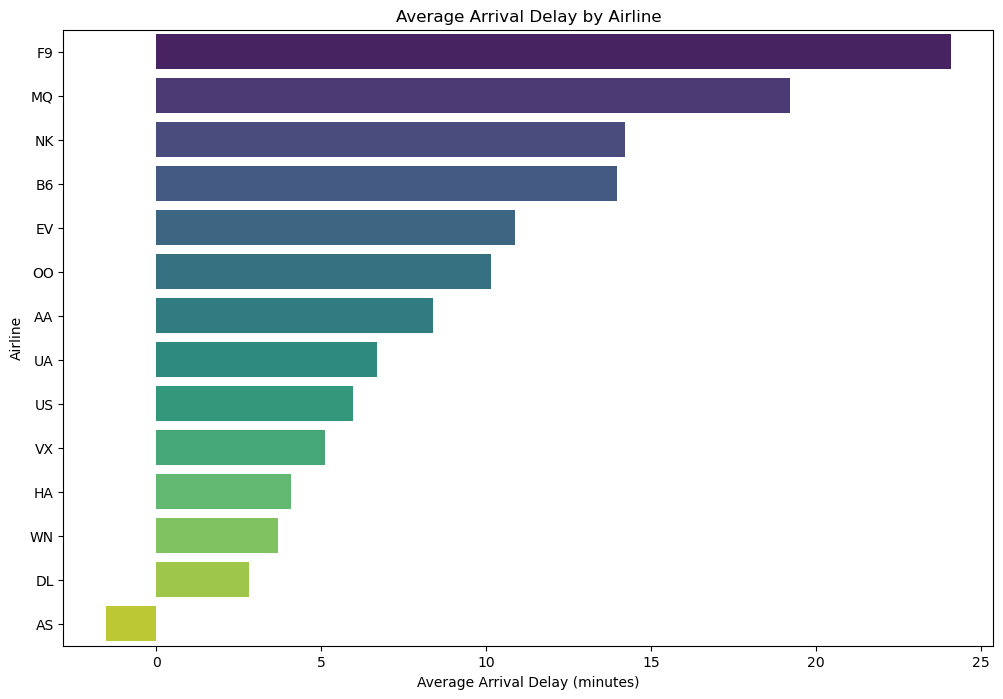

In [12]:
query = [
    {
        '$group': {
            '_id': '$AIRLINE', 
            'average_arrival_delay': { '$avg': '$ARRIVAL_DELAY' }  
        }
    },
    {
        '$sort': { 'average_arrival_delay': -1 }  
    }
]

results = list(collection.aggregate(query))

df = pd.DataFrame(results)
df.columns = ['Airline', 'Average Arrival Delay']  

plt.figure(figsize=(12, 8))
sns.barplot(x='Average Arrival Delay', y='Airline', data=df, palette='viridis')

plt.title('Average Arrival Delay by Airline')
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Airline')


plt.show()


g) Days of months with respect to average of arrival delays. [Create a suitable plot using
matplotlib/seabor

h) Write a MongoDB aggregation pipeline to find the top 10 airports with the highest average total delay
(DEPARTURE_DELAY + ARRIVAL DELAY).


i) Explain how you would create an index on the ORIGIN_AIRPORT and DESTINATION_AIRPORT fields to
optimize queries filtering by these fields

.
j) Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using
matplotlib/seaborn

]
k) Arrange Days of month as per cancellations done in descending order. [Create a suitable plot using
matplotlib/seaborn]



l) Find the busiest airports with respect to day of week. Represent it by using suitable plot

.
m) Find top 10 Airlines of US. Represent it by using suitable plot.


n) Finding airlines that make the maximum, minimum number of cancellations.


o) Find and show airlines names in descending that make the most number of diversions made. [Create
a suitable plot using matplotlib/seaborn

]
p) Finding days of month that see the most number of diversion and delays.


q) Write a MongoDB query to find the flights with the shortest and longest AIR_TIME. Return the
flightNumber, airline, and AIR_TIME

.
r) Finding all diverted Route from a source to destination Airport &amp; which route is the most diverted
route

.
s) Write a MongoDB aggregation pipeline to calculate the all aggregated values for departure delay
(DEPARTURE_DELAY) and arrival delay (ARRIVAL_DELAY) for each airline, excluding flights that were
either cancelled or diverte

d.
t) Write a MongoDB query to find all flights that were delayed due to WEATHER_DELAY but were not
cancelled or diverted. Include the flightNumber, airline, originAirport, and destinationAirport in the
result

s.
u) Write a MongoDB query to find all flights that were delayed both at departure (DEPARTURE_DELAY)
and arrival (ARRIVAL_DELAY). Return the count of such Flights which are delayed

.
v) Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined time
intervals (e.g., every hour) throughout the day. Generate a Suitable Plot

.
w) Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined week
of day. Generate a Suitable Plot

.
x) Write a MongoDB query to find all flights that departed between 6 AM and 12 PM (noon) local time,
regardless of the date. Return the flightNumber, airline, and departureTime. Generate a Bar Plot using
Time (x-axis) and Frequency (y-axis).